In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sb 
import plotly.express as px
import plotly.graph_objects as go
    from apyori import apriori
from scipy.io import arff

ModuleNotFoundError: No module named 'apyori'

In [ ]:
nomidata= arff.loadarff('nominalcovid.arff')
nominaldata = pd.DataFrame(nomidata[0])
nominaldata.info()

In [3]:
records = []
for i in range(0, 5644):
    records.append([str(nominaldata.values[i,j]) for j in range(0, 38)])

NameError: name 'nominaldata' is not defined

In [4]:
#Applying Apriori
association_rules = apriori(records, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results = list(association_rules)
print(association_results[0])

NameError: name 'apriori' is not defined

In [2]:
#Viewing the Results

for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

NameError: name 'association_results' is not defined

In [2]:
balance_data = arff.loadarff('covidbalance.arff')
balancedata = pd.DataFrame(balance_data[0])

In [3]:
#count mean std min 25% 50% 75% max of each attribute
describe = balancedata.describe()

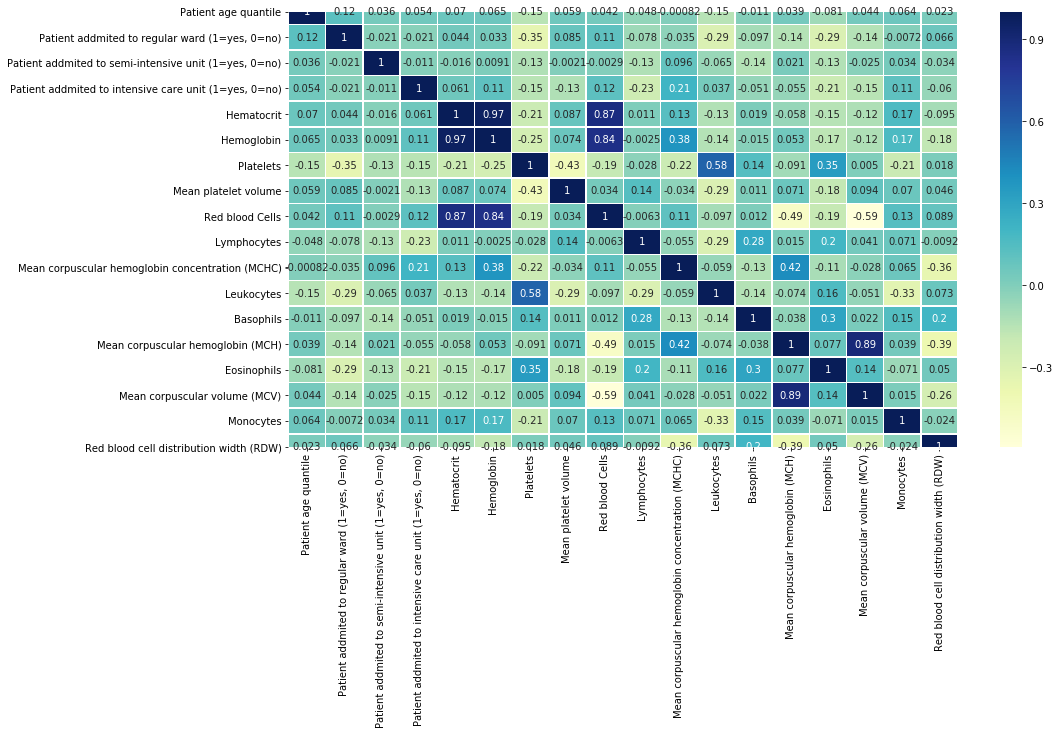

In [55]:
#heat map
# Correlation
corr = balancedata.corr()
# Covariance
cov = balancedata.cov() 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
# Generate a custom diverging colormap
cmap = sb.diverging_palette(10, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

In [ ]:
#Boxplot ของค่าเม็ดเลือดขาวโดยแยกตาม SARS-Cov-2 exam result //
WBC_data = balancedata[['SARS-Cov-2 exam result','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes']]
#Scatter plot เปรียบเทียบจำนวนเม็ดเลือดแดง เม็ดเลือดขาวและเกล็ดเลือดระหว่าง คนที่เป็นกับไม่เป็น
RWP_data = balancedata[['SARS-Cov-2 exam result','Red blood Cells','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes','Platelets']]
#Boxplot เปรียบเทียบจำนวนเม็ดเลือดขาวแบบต่าง ๆ ของคนที่เป็น positive มีจำนวนเม็ดเลือดขาวชนิดไหนมีการเปลี่ยนแปลงมากที่สุด เมื่อเทียบกับคนที่เป็น negative
WBC_data = balancedata[['SARS-Cov-2 exam result','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes']]
#Histogram ของคนที่เป็น positive มีเชื้อไวรัสอะไรที่ตรวจพบพร้อมกับการติดโรคโควิดมากที่สุด //
virus_data = balancedata[['SARS-Cov-2 exam result','Respiratory Syncytial Virus','Influenza A','Influenza B','Parainfluenza 1','CoronavirusNL63','Rhinovirus/Enterovirus','Coronavirus HKU1','Parainfluenza 3','Chlamydophila pneumoniae','Adenovirus','Parainfluenza 4','Coronavirus229E','CoronavirusOC43','Inf A H1N1 2009','Bordetella pertussis','Metapneumovirus','Parainfluenza 2','Influenza B, rapid test','Influenza A, rapid test']
#Histogram ในผู้ที่เป็น positive เป็นผู้ป่วยที่เข้ารับการรักษาเป็นแบบใดมากที่สุด หน่วยปกติกึ่งวิกฤต และวิกฤต //
PAdmit_data = balancedata[['SARS-Cov-2 exam result','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)']]

In [7]:
balancedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 38 columns):
Patient age quantile                                     5644 non-null float64
SARS-Cov-2 exam result                                   5644 non-null object
Patient addmited to regular ward (1=yes, 0=no)           5644 non-null float64
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644 non-null float64
Patient addmited to intensive care unit (1=yes, 0=no)    5644 non-null float64
Hematocrit                                               5644 non-null float64
Hemoglobin                                               5644 non-null float64
Platelets                                                5644 non-null float64
Mean platelet volume                                     5644 non-null float64
Red blood Cells                                          5644 non-null float64
Lymphocytes                                              5644 non-null float64
Mean corpuscular hemoglob

In [100]:
WBC_data = balancedata[['SARS-Cov-2 exam result','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes']]
p=WBC_data[WBC_data['SARS-Cov-2 exam result']==b'positive']
n=WBC_data[WBC_data['SARS-Cov-2 exam result']==b'negative']
WBC_data.describe()

,Lymphocytes,Leukocytes,Basophils,Eosinophils,Monocytes
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,-0.007786,-0.051363,-0.009858,-0.035812,0.030943
std,0.317289,0.328023,0.317016,0.292925,0.383682
min,-1.830953,-1.928470,-1.140144,-0.835508,-2.163721
25%,-0.000000,0.000000,-0.000000,0.000000,-0.000000
50%,-0.000000,0.000000,-0.000000,0.000000,-0.000000
75%,-0.000000,0.000000,-0.000000,0.000000,-0.000000
max,3.764100,4.455255,11.078219,8.350876,4.507133


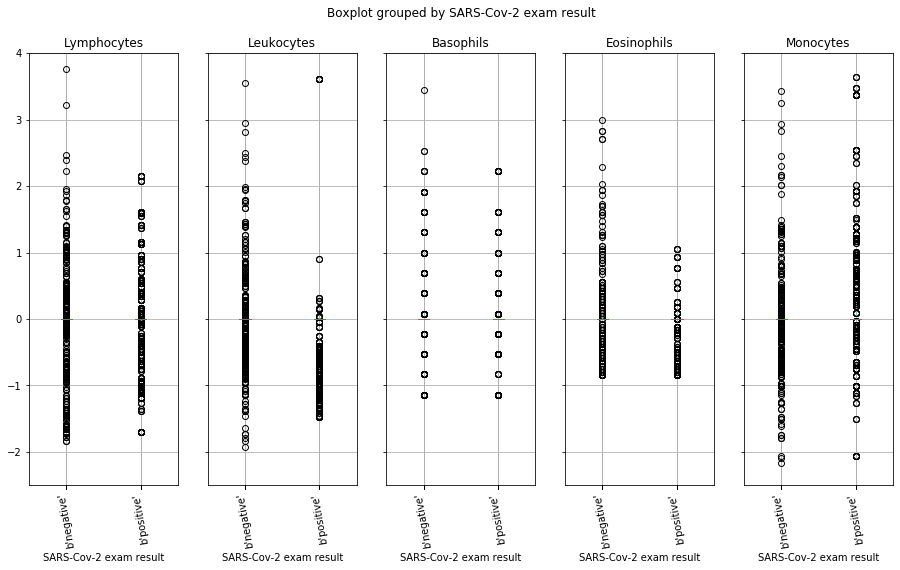

In [18]:
#Boxplot ของค่าเม็ดเลือดขาวโดยแยกตาม SARS-Cov-2 exam result
whiteBloodCell = ['Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes']
balancedata.boxplot(whiteBloodCell,'SARS-Cov-2 exam result',rot = 100,figsize=(15,8),layout=(1,5))
plt.ylim(-2.5, 4)
plt.show()

In [22]:
WBC_data = balancedata[['SARS-Cov-2 exam result','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes','Platelets','Red blood Cells']]
WBC_data = WBC_data.replace(b'negative', 0)
WBC_data = WBC_data.replace(b'positive', 1)

fig = go.Figure()
fig.add_trace(go.Box(
    y=WBC_data['Lymphocytes'],
    name="Lymphocytes",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=WBC_data['Leukocytes'],
    name="Leukocytes",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=WBC_data['Basophils'],
    name="Basophils",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=WBC_data['Eosinophils'],
    name="Eosinophils",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=WBC_data['Monocytes'],
    name="Monocytes",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=WBC_data['Platelets'],
    name="Platelets",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))
fig.add_trace(go.Box(
    y=WBC_data['Red blood Cells'],
    name="Red blood Cells",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))

fig.update_layout(title_text="Box Plot of each blood cells")
fig.show()

In [28]:
fig = px.scatter(RWP_data, y='SARS-Cov-2 exam result', x='Red blood Cells')
fig.show()

In [38]:
#Scatter plot เปรียบเทียบจำนวนเม็ดเลือดแดง เม็ดเลือดขาวและเกล็ดเลือดระหว่าง คนที่เป็นกับไม่เป็น
RWP_data = balancedata[['SARS-Cov-2 exam result','Red blood Cells','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes','Platelets']]
RWP_data = RWP_data.replace(b'negative', 0)
RWP_data = RWP_data.replace(b'positive', 1)

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=RWP_data['Red blood Cells'],
    histfunc="count",
    name='Red blood Cells', # name used in legend and hover labels
    marker_color='#F8B195',
    opacity=1
))

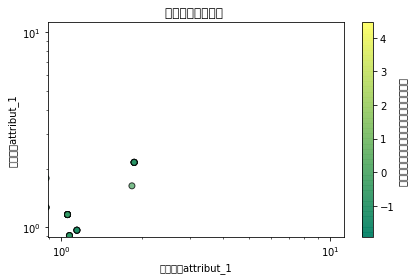

In [31]:
#Scratter plot เปรียบเทียบจำนวนเม็ดเลือดแดง เม็ดเลือดขาวและเกล็ดเลือดระหว่าง คนที่เป็นกับไม่เป็น
RWP_data = balancedata[['SARS-Cov-2 exam result','Red blood Cells','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes','Platelets']]

attribut_1 = RWP_data['Red blood Cells'] #attribut ที่ต้องการ plot
attribut_2 = RWP_data['Lymphocytes']
attribut_3 = RWP_data['Leukocytes']

plt.scatter(attribut_1, attribut_2 , c = attribut_3 , cmap='summer',
  edgecolor='black', linewidth=1,alpha=0.75) # c จะเป็นตัวหนดความเข้มของสี  cmap เป็นรูปแบบสี
cbar =plt.colorbar()
cbar.set_label('คำอธิบายความเข้มสี ' )
plt.xscale('log') # ถ้าข้อมูลมันห่างเยอะ ใช้โค๊ดนี้ 
plt.yscale('log')  

plt.title('ชื่อกราฟ ')
plt.xlabel('ชื่อattribut_1')
plt.ylabel('ชื่อattribut_1')

plt.tight_layout()
plt.show()